## ANOVA - symulacje

In [1]:
import numpy as np
import pandas as pd
mu1 = 0
mu2 = 0.5
mu3 = -0.5
sigma = 10
size1 = 100
size2 = 1000
size3 = 300
rnd1 = list(np.random.normal(mu1, sigma, size1))
rnd2 = list(np.random.normal(mu2, sigma, size2))
rnd3 = list(np.random.normal(mu3, sigma, size3))
rnd1.extend(rnd2)
rnd1.extend(rnd3)
rnd = rnd1
smp1 = list(np.repeat('s1', size1))
smp2 = list(np.repeat('s2', size2))
smp3 = list(np.repeat('s3', size3))
smp1.extend(smp2)
smp1.extend(smp3)
smp = smp1
df_anova = pd.DataFrame({'var': rnd, 'smp': smp})
print(df_anova.head(20))

   smp        var
0   s1  -7.204020
1   s1   3.937689
2   s1  -5.813487
3   s1   4.817488
4   s1  -0.334823
5   s1  -7.044886
6   s1  -6.623852
7   s1  -4.934052
8   s1  10.032347
9   s1   0.722616
10  s1   8.561234
11  s1   7.891747
12  s1   8.813270
13  s1 -12.776002
14  s1  -0.199109
15  s1   6.711270
16  s1  11.812132
17  s1   0.002028
18  s1  -1.885692
19  s1  -7.142692


C:\Users\Wojtek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


[]

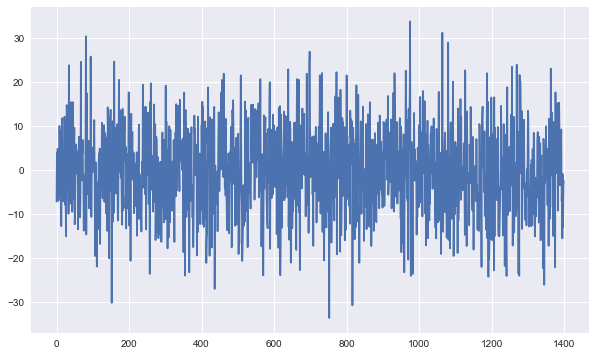

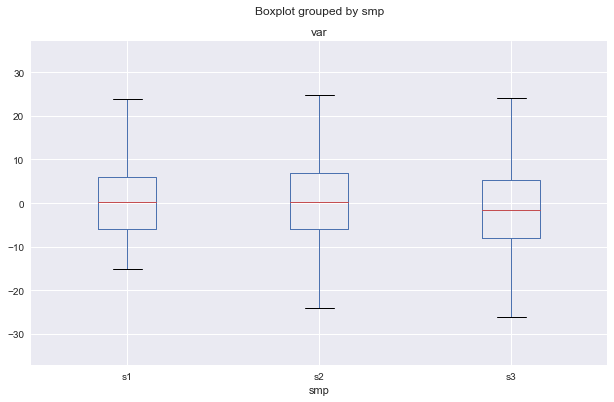

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(rnd)
bp = df_anova.boxplot('var', by = 'smp', figsize=(10,6))
bp.plot()
#df_anova.plot()

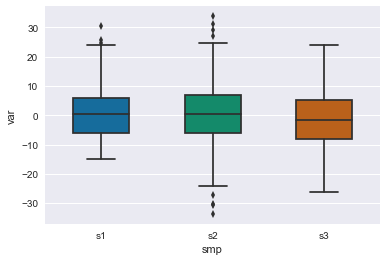

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.figure(figsize=(20,14))
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#plt.subplots(figsize=(20,15))
#fig, ax = plt.subplots(figsize=(20,15))
plt.figure(figsize=(10, 6))
%matplotlib inline
bplot = sns.boxplot(y='var', x='smp', data=df_anova, width=0.5, palette="colorblind")
plt.show()

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('var ~ smp', data=df_anova).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
#print(mod)

                 sum_sq      df         F    PR(>F)
smp          730.924614     2.0  3.814973  0.022268
Residual  133828.156281  1397.0       NaN       NaN


In [21]:
from pyvttbl import DataFrame

aov_pyvttbl = df_anova.anova1way('weight', 'group')
print(aov_pyvttbl)

ModuleNotFoundError: No module named 'pyvttbl'

In [15]:
help(sns.set)

Help on function set in module seaborn.rcmod:

set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
    Set aesthetic parameters in one step.
    
    Each set of parameters can be set directly or temporarily, see the
    referenced functions below for more information.
    
    Parameters
    ----------
    context : string or dict
        Plotting context parameters, see :func:`plotting_context`
    style : string or dict
        Axes style parameters, see :func:`axes_style`
    palette : string or sequence
        Color palette, see :func:`color_palette`
    font : string
        Font family, see matplotlib font manager.
    font_scale : float, optional
        Separate scaling factor to independently scale the size of the
        font elements.
    color_codes : bool
        If ``True`` and ``palette`` is a seaborn palette, remap the shorthand
        color codes (e.g. "b", "g", "r", etc.) to the colors from this pal